## Week 9-10

## Name         : Ayachit Madhukar  
## Course       : DSC540 
## Instructor  : Catherine Williams
## Date           : 16 May 2021

In [361]:
## Setting up environemnt
import os
os.getcwd() 
import sys
sys.path.append('../data')

In [362]:
## loading required libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [363]:
os.getcwd() 

'/Users/madhukarayachit/DSC540/Excercise'

### Activity 9: Extracting the Top 100 eBooks from Gutenberg

### Task 1
Import the necessary libraries, including regex and beautifulsoup.


In [364]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### Task 2
Check the SSL certificate.

In [298]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Task 3
Read the HTML from the URL.



In [300]:
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)
response

<Response [200]>

### Task 4
Write a small function to check the status of the web request.


In [301]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [302]:
status_check(response)

Success!


1

### Task 5
Decode the response and pass this on to BeautifulSoup for HTML parsing.


In [303]:
contents = response.content.decode(response.encoding)

In [305]:
soup = BeautifulSoup(contents, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>
<m

### Task 6
Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.



In [306]:
lst_links=[]

In [307]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [308]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### Task 7
Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.


In [310]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [311]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 84, 11, 98, 2701, 1661, 174, 57775, 64317, 74, 65341, 844, 205, 46, 2591, 345, 43, 1260, 65337, 5200, 1400, 4300, 16, 2600, 76, 766, 219, 1952, 1232, 2542, 5740, 2852, 158, 1080, 768, 65339, 55, 45, 35899, 65335, 6130, 120, 65345, 58585, 514, 1497, 2554, 19797, 902, 27827, 65343, 996, 1250, 35249, 135, 1184, 25344, 1837, 863, 1727, 5739, 30254, 244, 43453, 203, 63256, 829, 36, 1399, 2814, 2500, 730, 3600, 40068, 408, 4363, 1998, 236, 17635, 16328, 42108, 3825, 65331, 521, 160, 35]


### Task 8
Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.


In [314]:
booknum=[]

for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))
        
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 84, 11, 98, 2701, 1661, 174, 57775, 64317, 74, 65341, 844, 205, 46, 2591, 345, 43, 1260, 65337, 5200, 1400, 4300, 16, 2600, 76, 766, 219, 1952, 1232, 2542, 5740, 2852, 158, 1080, 768, 65339, 55, 45, 35899, 65335, 6130, 120, 65345, 58585, 514, 1497, 2554, 19797, 902, 27827, 65343, 996, 1250, 35249, 135, 1184, 25344, 1837, 863, 1727, 5739, 30254, 244, 43453, 203, 63256, 829, 36, 1399, 2814, 2500, 730, 3600, 40068, 408, 4363, 1998, 236, 17635, 16328, 42108, 3825, 65331, 521, 160, 35]


### Task 9
What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).




In [315]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-05-15133040
last 7 days1105659
last 30 days4879416



Top 100 EBooks yesterd

### Task 10
Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).



In [316]:
lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')


### Task 11
Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.


In [ ]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

### Task 12
Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.



### Task 13
Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.



In [318]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [319]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
Frankenstein
Alice
A Tale of Two Cities by Charles Dickens 
Moby Dick
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Picture of Dorian Gray by Oscar Wilde 
Le jardin des supplices by Octave Mirbeau 
The Great Gatsby by F
The Adventures of Tom Sawyer
Treatise on Poisons by Sir Robert Christison 
The Importance of Being Earnest
Walden
A Christmas Carol in Prose
Grimms
Dracula by Bram Stoker 
The Strange Case of Dr
Jane Eyre
The Age of Justinian and Theodora
Metamorphosis by Franz Kafka 
Great Expectations by Charles Dickens 
Ulysses by James Joyce 
Peter Pan by J
War and Peace by graf Leo Tolstoy 
Adventures of Huckleberry Finn by Mark Twain 
David Copperfield by Charles Dickens 
Heart of Darkness by Joseph Conrad 
The Yellow Wallpaper by Charlotte Perkins Gilman 
Il Principe
Et dukkehjem
Tractatus Logico
The Hound of the Baskervilles by Arthur Conan Doyle 
Emma by Jane Austen 
A Modest Proposal by Jonathan Swi

### Activity 10: Building Your Own Movie Database by Reading an API


### Task 1 
Import urllib.request, urllib.parse, urllib.error, and json.


In [320]:
import urllib.request, urllib.parse, urllib.error
import json

### Task 2 
Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.



In [341]:
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

omdbapi
#18cdc959

'ab4b8ae9'

### Task 3 
Obtain a key and store it in JSON as APIkeys.json.


In [ ]:
# registred to site to obtain url and API Key

### Task 4
Open the APIkeys.json file.


In [350]:
# updated APIkey in the file

### Task 5
Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.



In [351]:
serviceurl = 'http://www.omdbapi.com/?'

### Task 6
Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.


In [352]:

apikey = '&apikey='+omdbapi

### Task 7
Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).


In [353]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

### Task 8
Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.



In [354]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

### Task 9
Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.



In [355]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

### Task 10
Test the search_movie function by entering Titanic.



In [356]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=ab4b8ae9
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 114 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,060,049
imdbID: tt0120338
--------------------------------------------------


### Task 11
Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [347]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=ab4b8ae9
Error encountered:  Movie not found!


### Activity : Connect to the Twitter API and do a simple data pull

### Task  a - g 
a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token


h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [374]:
# install twitter module
!pip install python-twitter

     |████████████████████████████████| 67 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 4.0 MB/s eta 0:00:01


In [375]:
import twitter

In [378]:
key='a2DXLVFos9wXyrJdH8uKaVXJs'
secret='qBmTyLsoUWPLeDriexbHGzrrNrchfQjpHZlSTctgmJk6xHxb4M'
token='1394130831229300736-yYZfdPr61t4al3iYUGtFdLr6FpXhID'
token_secret='Nky612blKkmyeGKUccx29P4tNSpCUTFVjcYipnbuZQVWy'

api = twitter.Api(consumer_key=key,
  consumer_secret=secret,
    access_token_key=token,
    access_token_secret=token_secret)

In [379]:
print(api.VerifyCredentials())

{"created_at": "Mon May 17 03:21:15 +0000 2021", "default_profile": true, "default_profile_image": true, "id": 1394130831229300736, "id_str": "1394130831229300736", "name": "mayachit", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "mayachit1", "withheld_in_countries": []}


In [380]:
search_word='Bellevue University'
api.GetSearch(term=search_word, since=2016-11-21, count=10)

[Status(ID=1396562917886205952, ScreenName=jaycchristine, Created=Sun May 23 20:25:21 +0000 2021, Text='RT @BellevueU: Jeff Stock was shocked when he learned that he and his wife were expecting quadruplets. Now, all 4 children are grown up and…'),
 Status(ID=1396553592107044868, ScreenName=StopVirtuaStalk, Created=Sun May 23 19:48:17 +0000 2021, Text='RT @BellevueU: Jeff Stock was shocked when he learned that he and his wife were expecting quadruplets. Now, all 4 children are grown up and…'),
 Status(ID=1396544001889554432, ScreenName=sinaibernal7, Created=Sun May 23 19:10:11 +0000 2021, Text='RT @BellevueU: Jeff Stock was shocked when he learned that he and his wife were expecting quadruplets. Now, all 4 children are grown up and…'),
 Status(ID=1396511440274661382, ScreenName=BellevueU, Created=Sun May 23 17:00:47 +0000 2021, Text='Jeff Stock was shocked when he learned that he and his wife were expecting quadruplets. Now, all 4 children are gro… https://t.co/O8uWtDF3xB'),
 Status(ID=

In [381]:
search_word='Data Science”'
api.GetSearch(term=search_word, since=2016-11-21, count=10)

[Status(ID=1396438505665007618, ScreenName=devisridhar, Created=Sun May 23 12:10:58 +0000 2021, Text='My take on current situation: variants will continue to cause issues but our vaccines (both doses!) are effective a… https://t.co/DqVjm12G4e'),
 Status(ID=1395963047093673986, ScreenName=michaelmina_lab, Created=Sat May 22 04:41:40 +0000 2021, Text='The public is getting a chance to see science discovery in action. It’s tough for scientists - can only imagine wha… https://t.co/8fuRcdIOxw'),
 Status(ID=1395951087706787843, ScreenName=CraigKellyMP, Created=Sat May 22 03:54:09 +0000 2021, Text='Follow the Science : \n\n‘’The accumulated data demonstrating the efficacy &amp; safety in the use of IVERMECTIN against… https://t.co/YAWnaPGlQ4'),
 Status(ID=1396568230760755204, ScreenName=BestOnlineWrit3, Created=Sun May 23 20:46:27 +0000 2021, Text='Kindly DM us if you need help in\nComputer science \nGeometry\nPsychology\nSociology\nData analysis\nMusic\nThesis\nProject… https://t.co/DWGwQbY6

### Activity : Visualization
Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [417]:
df=pd.read_csv("data/Boston_housing.csv")

In [418]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [419]:
# Write your code here
df1=df[['CRIM','ZN','INDUS','RM','AGE','DIS','RAD','TAX','PTRATIO','PRICE']]

In [421]:
import matplotlib.pyplot as plt

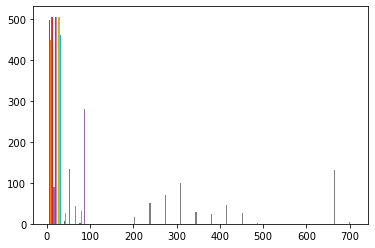

<Figure size 432x288 with 0 Axes>

In [435]:
# histograms of all the variables 

plt.hist(df1,bins=20)

f = plt.figure()
plt.show()
f.savefig("plot1.pdf", bbox_inches='tight')

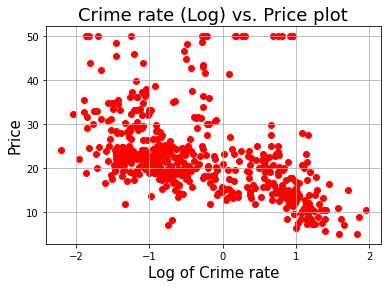

<Figure size 432x288 with 0 Axes>

In [436]:
#  scatter plot of crime and price
plt.scatter(np.log10(df1['CRIM']),df1['PRICE'],c='red')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
f = plt.figure()
plt.show()
f.savefig("plot2.pdf", bbox_inches='tight')

In [425]:
import matplotlib.pyplot as plt

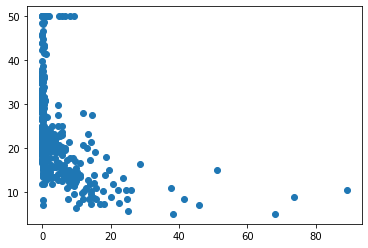

<Figure size 432x288 with 0 Axes>

In [437]:
# Scatter plot
plt.scatter(df1['CRIM'],df1['PRICE'])
f = plt.figure()
plt.show()
f.savefig("plot3.pdf", bbox_inches='tight')

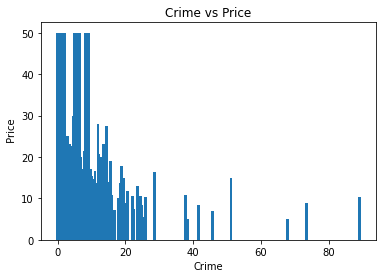

<Figure size 432x288 with 0 Axes>

In [438]:
#default bar chart
plt.bar(df1['CRIM'], df1['PRICE'])
plt.title('Crime vs Price')
plt.xlabel('Crime')
plt.ylabel(' Price')
f = plt.figure()
plt.show()
f.savefig("plot4.pdf", bbox_inches='tight')

<AxesSubplot:>

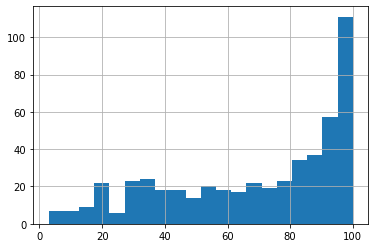

In [433]:
#Histogram
df1['AGE'].hist(bins=20)